# Fuzzy logic
Код был интерпретирован для работы с Python 3.8.   
Также была изменена цветовая схема графиков для большей контрастности.   
Код был взят [здесь](https://www.youtube.com/watch?v=6R4jKWgdXQA). 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import math
from itertools import product

In [5]:
def triangle_FS (U, a=None, b=None, c=None, d=None, h=1, form='equal'):
    if form in ['equal', 'greater', 'less']:
        if a is None:
            a = U.min()
        if c is None:
            c = U.max()
        if b is None:
            if d is None:
                b = (a + c) / 2
            else:
                b = d
        if d is None:
            d = b
        Mu = dict()
        if a > U.min():
            for el in U[U<=a]:
                Mu[el] = h if form == 'less' else 0
        if c < U.max():
            for el in U[U>=c]:
                r = h if form == 'greater' else 0
                z = Mu.get(el, 0)
                Mu[el] = r if r>z else z
        if a < b:
            for el in U[(U >= a) * (U <= b)]:
                r = 0 if form == 'greater' else h * float(el-a) / (b - a) if form == 'equal' else h * float(b - el) / (b - a)
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        if b < d:
            for el in U[(U >= b) * (U <= d)]:
                r = h if form == 'equal' else 0
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        if d < c:
            for el in U[(U >= d) * (U <= c)]:
                r = 0 if form == 'less' else h* float(el - d) / (c - d) if form == 'greater' else h * float(c - el) / (c - d)
                z = Mu.get(el, 0)
                Mu[el] = r if r > z else z
        return Mu
    else:
        print('Unknown form')
        return None

In [42]:
color = ['green', 'black', 'red']

def FS_plot(FS, colors=colors.cnames.keys(), labels = None, title=None, name=None):
    for idx,el in enumerate(FS):
        mas = np.array(sorted(el.items(), key=lambda x: x[0])).T
        if (labels is None):
            lab = ' '
        else:
            lab = labels[idx]
        plt.plot(mas[0], mas[1], color=color[idx], label=lab)
    if not (labels is None):
        plt.legend(loc= 'upper right')
    if not (title is None):
        plt.title(title)
    if not (name is None):
        plt.savefig(name + '.png', format='png', dpi=100)
    plt.show()

0
1
2


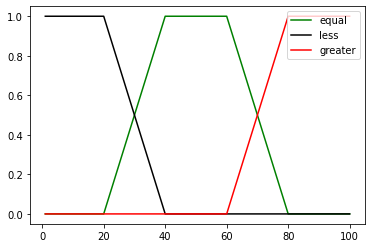

In [41]:
Spr = np.arange(1, 101)
Pr1 = triangle_FS(Spr, a=20, b=40, d=60, c=80)
Pr2 = triangle_FS(Spr, a=20, b=40, d=60, c=80, form='less')
Pr3 = triangle_FS(Spr, a=20, b=40, d=60, c=80, form='greater')
FS_plot([Pr1, Pr2, Pr3], labels=['equal', 'less', 'greater'])

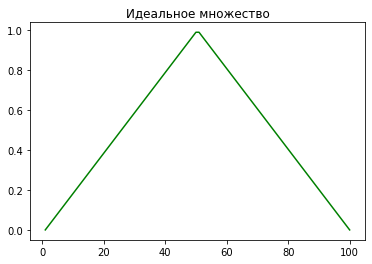

In [43]:
Pr4 = triangle_FS(Spr)
FS_plot([Pr4], title=u'Идеальное множество')

In [44]:
Pr1[25]

0.25

In [46]:
def F_And(FV, method='minimax'):
    if method == 'minimax':
        return np.min(FV)
    elif method == 'probability':
        return np.product(FV)
    else:
        print('Неизвестный метод ', method)
        return None
    
    
def F_0r(FV, method='minimax'):
    if method == 'minimax':
        return np.max(FV)
    elif method == 'probability':
        mu=0
        for el in FV:
            mu = mu + el - mu * el
        return mu
    else:
        print('Неизвестный метод ', method)
        return None

    
def F_Not(V1):
    return 1 - V1

In [58]:
def alpha_srez(FS, alpha=0.5):
    alph=1e-10 if alpha==0 else alpha
    mas = np.array(FS.items()).T
    print(mas)
    return set(mas[0][mas[1]>=alph])

In [48]:
def FS_moment(FS, centr=None):
    mas = np.array(FS.items()).T
    if centr is None:
        Cntr_g=np.sum(mas[0] * mas[1]) / np.sum(mas[1])
    else:
        Cntr_g = centr
    return np.sum(mas[1] * np.square(mas[0] - Cntr_g))


def FS_describe(FS, method='minimax', verbose=True):
    mas = np.array(FS.items()).T
    h = np.max(mas[1])
    N = np.sum(mas[1]>0)
    Min_el = np.min(mas[0][mas[1]>0])
    Max_el = np.max(mas[0][mas[1]>0])
    Fst_max = np.min(mas[0][mas[1]==h])
    Lst_max = np.max(mas[0][mas[1]==h])
    Cntr_max = mas[0][mas[1]==h].mean()
    Cntr_grav = np.sum(mas[0] * mas[1]) / np.sum(mas[1])
    Mmnt_in = FS_moment(FS)
    R1 = -np.sum([0 if x==0 else x * np.log2(x) for x in mas[1]])
    R1n = (2. * R1) / len(mas[1])
    R2 = 2. / len(mas[1]) * np.sum([F_And([x,F_Not(x)], method=method) for x in mas[1]])
    R3 = 2. / np.sqrt(len(mas[1])) * np.sqrt(np.sum([F_And([x, F_Not(x)], nethod=method)**2 for x in mas[1]]))
    if verbose:
        print('Высота = ', h)
        print('Мощность = ', N)
        print('Диапозон значений = ', Min_el, Max_el)
        print('Максимумы = ', Fst_max, Cntr_max, Lst_max)
        print('Центр тяжести = ', Cntr_grav)
        print('Момент инерции = ', Mmnt_in)
        Print('Размытость')
        print('Энтропийная мера ', R1, R1n)
        print(f'Альтернатива 1(линейная) :{R2}')
        print(f'Альтернатива 2 (квадратичная :{R3})')
    return (h, N, (Min_el, Max_el), (Fst_max, Cntr_max, Lst_max), Cntr_grav, Mmnt_in, ((R1, R1n), R2, R3))

In [59]:
alpha_srez(Pr1, alpha=0.5)

dict_items([(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (21, 0.05), (22, 0.1), (23, 0.15), (24, 0.2), (25, 0.25), (26, 0.3), (27, 0.35), (28, 0.4), (29, 0.45), (30, 0.5), (31, 0.55), (32, 0.6), (33, 0.65), (34, 0.7), (35, 0.75), (36, 0.8), (37, 0.85), (38, 0.9), (39, 0.95), (40, 1.0), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 0.95), (62, 0.9), (63, 0.85), (64, 0.8), (65, 0.75), (66, 0.7), (67, 0.65), (68, 0.6), (69, 0.55), (70, 0.5), (71, 0.45), (72, 0.4), (73, 0.35), (74, 0.3), (75, 0.25), (76, 0.2), (77, 0.15), (78, 0.1), (79, 0.05)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed